<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [281]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [319]:
df.rename({
    "GRADES_PK_G": "ENROLLED_PK",
    "GRADES_KG_G": "ENROLLED_KG",
    "GRADES_4_G": "ENROLLED_4",
    "GRADES_8_G": "ENROLLED_8",
    "GRADES_12_G": "ENROLLED_12",
    "GRADES_1_8_G": "ENROLLED_1_8",
    "GRADES_9_12_G" : "ENROLLED_9_12",
    "GRADES_ALL_G": "ENROLLED_ALL",
    "AVG_MATH_4_SCORE": "MATH_4_SCORE",
    "AVG_MATH_8_SCORE": "MATH_8_SCORE",
    "AVG_READING_4_SCORE": "READING_4_SCORE",
    "AVG_READING_8_SCORE": "READING_8_SCORE"
    }, 
    axis=1, inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: Math for 8 grade

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [320]:
df["YEAR"].nunique()

7

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [321]:
michigan_avg = df["MATH_8_SCORE"][df["STATE"] == "MICHIGAN"].mean()
ohio_avg = df["MATH_8_SCORE"][df["STATE"] == "OHIO"].mean()

if michigan_avg > ohio_avg:
    print("Michigan")
elif michigan_avg < ohio_avg:
    print("Ohio")
else:
    print("Same Average!")


Ohio


Find the average for your pedictor score across all states in 2019

In [322]:
df["MATH_8_SCORE"][df["YEAR"] == 2019].mean()

nan

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [323]:
df.groupby("STATE")["MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              276.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    265.0
FLORIDA                 281.0
GEORGIA                 279.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                286.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [324]:
# All the below convert the desired features to a per student average so they are comparable to an average score with is per student
df["TOTAL_REVENUE_PER_STUDENT"] = df["TOTAL_REVENUE"] / df["ENROLL"]

df["TOTAL_EXPENDITURE_PER_STUDENT"] = df["TOTAL_EXPENDITURE"] / df["ENROLL"]

Final feature list: TOTAL_REVENUE_PER_STUDENT, TOTAL_EXPENDITURE_PER_STUDENT, MATH_4_SCORE, READING_4_SCORE, READING_8_SCORE

Feature selection justification: The first features aim to identify how much money is allocated to each student. The other test scores are included to identify the education level of students as a whole.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

<AxesSubplot:title={'center':'Math 8th Grade Score vs Math 4th Grade Score'}, xlabel='4th Grade Math Score', ylabel='8th Grade Math Score'>

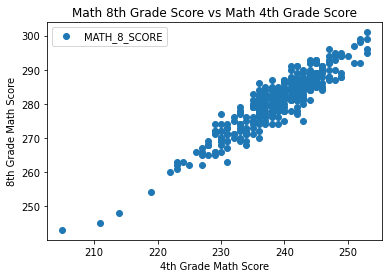

In [325]:
df.plot(x='MATH_4_SCORE', xlabel='4th Grade Math Score', y='MATH_8_SCORE', ylabel='8th Grade Math Score', title="Math 8th Grade Score vs Math 4th Grade Score", style='o')

This graph indicates that there is a positive correlation between 4th and 8th grade math scores.

**Visualization 2**

<AxesSubplot:title={'center':'Math 8th Grade Score vs 8th Grade Reading Score'}, xlabel='8th Grade Reading Score', ylabel='8th Grade Math Score'>

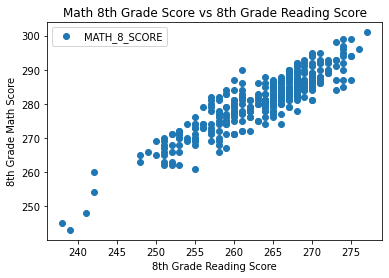

In [326]:
df.plot(x='READING_8_SCORE', xlabel='8th Grade Reading Score', y='MATH_8_SCORE', ylabel='8th Grade Math Score', title="Math 8th Grade Score vs 8th Grade Reading Score", style='o')

This graph indicates that there is a positive correlation between 8th grade reading and 8th grade math scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [327]:
from sklearn.model_selection import train_test_split

In [333]:
df.dropna(inplace=True)
df.reset_index()
X = df[['TOTAL_REVENUE_PER_STUDENT', 'TOTAL_EXPENDITURE_PER_STUDENT', 'MATH_4_SCORE', 'READING_4_SCORE', "READING_8_SCORE"]]
y = df.loc[X.index]['MATH_8_SCORE']

In [334]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: REGRESSION

In [330]:
from sklearn.linear_model import LinearRegression

In [331]:
# create your model here
model = LinearRegression()

In [335]:
model.fit(X_train, y_train)

LinearRegression()

In [336]:
y_pred = model.predict(X_test)

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

/Users/willgeorge/Desktop/mdst_tutorials_F21/env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-51.99764506295759
[-0.77508701  0.83709245  0.92853361 -0.40951543  0.75991803]


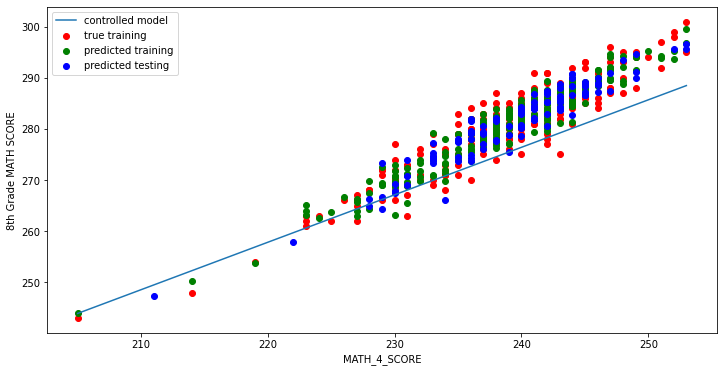

In [342]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'MATH_4_SCORE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade MATH SCORE')

print(model.intercept_)
print(model.coef_)

<h2> Summary </h2>

The following are the features and their associated regression coefficients: (TOTAL_REVENUE_PER_STUDENT, -0.77508701), (TOTAL_EXPENDITURE_PER_STUDENT, 0.83709245), (MATH_4_SCORE, 0.92853361), (READING_4_SCORE, -0.40951543), (READING_8_SCORE, 0.75991803).  From this it can be seen that the 4th grade math scores, total expenditure per student, and 8th grade reading score, in order of descending positive correlation, all have a strong positive correlation with the 8th grade math scores.  This intuitively makes sense as a student with a high 4th grade math score, with the other conditions held relatively constant, would go on to get a high 8th grade math score. This assumption of a fairly static IQ also goes on to explain the correlation with 8th grade reading score.  The students who are well educated in one area are likely to be well educated in others.  Regarding the correlation with total expenditure per student, this is intuitive because a student who's education is more well funded will likely have more opportunities and resources at their disposal and the same is true for the inverse.  When considering the negative correlations total revenue per student and 4th grade reading score per student, in order of descending negative correlation, these are slightly less intuitive.  The state revenue per student may indicate that students in a large state have less education opportunities.  A potentially better feature would be normalizing the state revenue to the total educational expediture per student.  This would maintain the per student basis and allow for a more direct understanding of revenue allocation.  Generally, the negative correlation indicates that a high state revenue and low 8th grade test scores are related.  Now the 4th grade reading scores, this negative correlation may result from the fact that students who excel at reading from a young age are less apt to pursue math.